In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black

# Loading & Checking Data

In [11]:
# Read the data
tweets_df = pd.read_csv('twitter.csv')

In [12]:
# General look at the data
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [13]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [14]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [21]:
# Removing the label column
tweets_df = tweets_df.drop(['id'], axis=1)

# Exploring the dataset

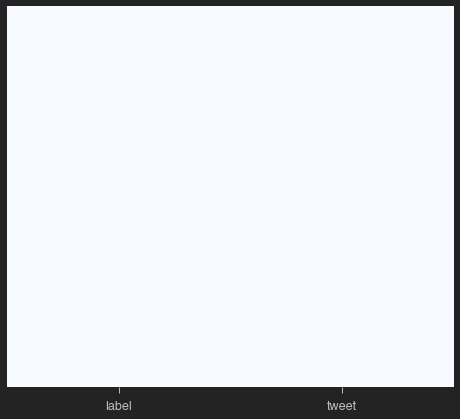

In [22]:
# Checking for null values -> will show up on heat map as a unique colour
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120ceaa30>]],
      dtype=object)

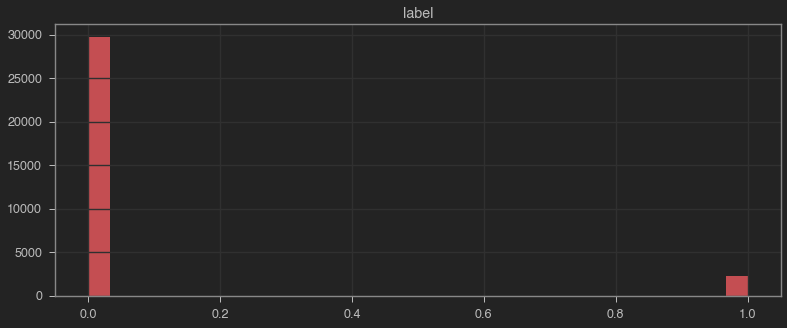

In [23]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

The data set is unbalanced. More labels are positive than negative. 

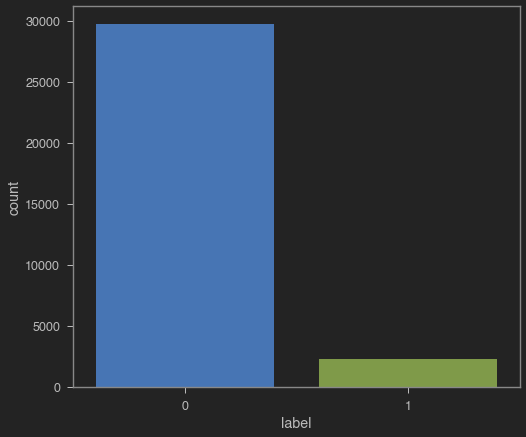

In [24]:
sns.countplot(x='label', data=tweets_df)

In [26]:
#Lengths of the tweets -> creating a new column called length and capturing the length of each tweet in it using the len function
tweets_df['Length'] = tweets_df['tweet'].apply(len)

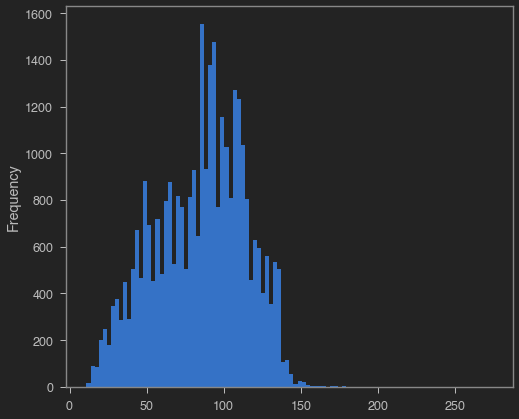

In [29]:
tweets_df['Length'].plot(bins=100, kind='hist')

Most tweets around 80-100 in length. The shortest is around 10.

In [30]:
tweets_df.describe()

,label,Length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [33]:
# Checking the tweet with the average length 
tweets_df[tweets_df['Length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [35]:
# Categorizing the tweet as positive and negative
positive = tweets_df[tweets_df['label']==0]
negative = tweets_df[tweets_df['label']==1]

# Plotting Word Cloud

In [37]:
!pip install WordCloud
from wordcloud import WordCloud

In [42]:
sentences= tweets_df['tweet'].tolist()

In [44]:
sentences_as_one_string = " ".join(sentences)

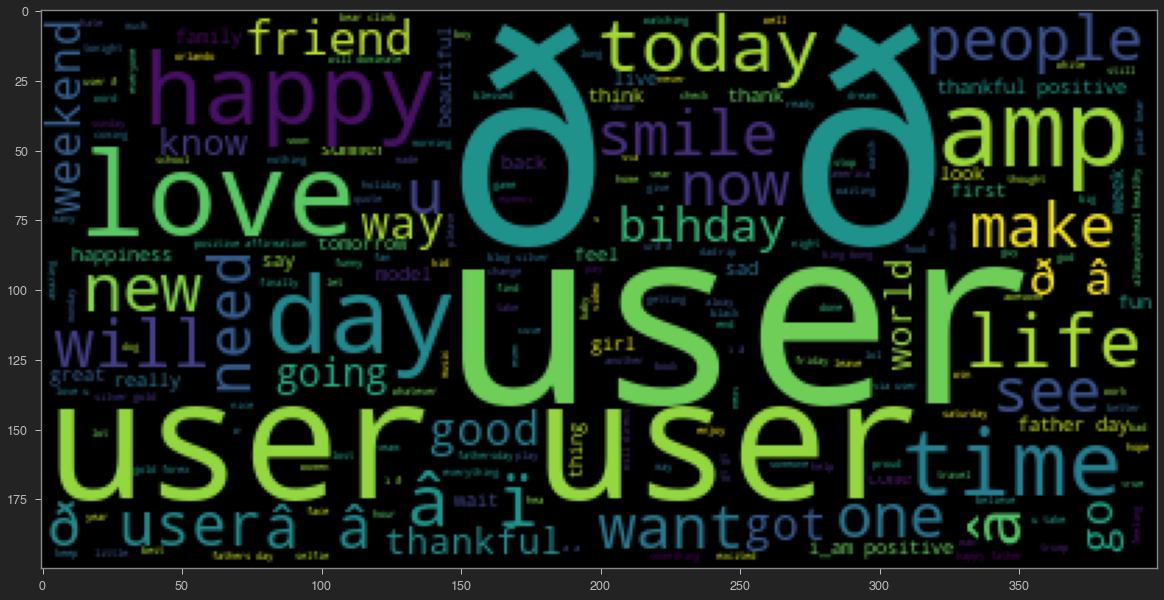

In [45]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [47]:
negative_sentences = negative['tweet'].tolist()

In [48]:
neg_sentences_as_one_string = " ".join(negative_sentences)

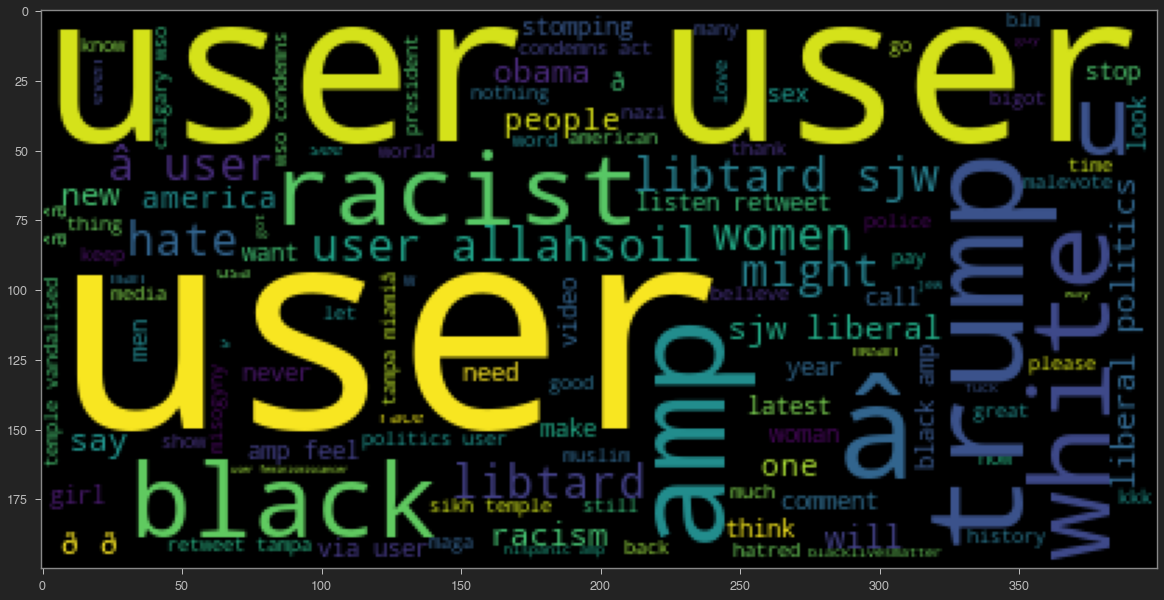

In [50]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_sentences_as_one_string))

# Data Cleaning

In [54]:
# removing punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [56]:
test_punc_removed = [char for char in Test if char not in string.punctuation]

In [69]:
test_punc_removed_join = "".join(test_punc_removed)

In [60]:
test_punc_removed_join

'G o o d   m o r n i n g   b e a u t i f u l   p e o p l e     I   a m   h a v i n g   f u n   l e a r n i n g   M a c h i n e   l e a r n i n g   a n d   A I'

In [62]:
# Removing stop words (non-value words such as "i, me, him, we etc") using NLP
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shahbaznaziri/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [64]:
from nltk.corpus import stopwords
## to see stop words, uncomment the rest of this line:
## stopwords.words('english')

In [71]:
test_punc_removed_join_clean = [word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [74]:
# Count vectorization (tokenization)
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

In [77]:
vectorizer = CountVectorizer() #creating an object from the vectorizer class to perform the vectorization automatically
X = vectorizer.fit_transform(sample_data)
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [78]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


#### PIPELINE TO REMOVE PUNCTUATION, STOPWORDS AND VECTORIZATION OF THE DF 

In [88]:
# Defining a function to remove punctuation and stopwords 
def message_cleaner(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [ ]:
# Testing the function:

In [93]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaner)

In [90]:
tweets_df_clean[5]

['22',
 'huge',
 'fan',
 'fare',
 'big',
 'talking',
 'leave',
 'chaos',
 'pay',
 'disputes',
 'get',
 'allshowandnogo']

In [92]:
print(tweets_df.tweet[5])

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [97]:
vectorizer = CountVectorizer(analyzer=message_cleaner) #The analyzer cleans the data as well before vectorizing using the created function
tweets_countvectorized = CountVectorizer(analyzer=message_cleaner, dtype='uint8').fit_transform(tweets_df['tweet']).toarray()

In [100]:
tweets_countvectorized.shape

(31962, 47386)

In [101]:
x = tweets_countvectorized

In [102]:
y = tweets_df['label']

# Training Model Using Naive Bayes Classifier

In [103]:
x.shape

(31962, 47386)

In [104]:
y.shape

(31962,)

In [105]:
# Calling sklearn for training the model using NB
from sklearn.model_selection import train_test_split

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [107]:
from sklearn.naive_bayes import MultinomialNB
NBClassifier = MultinomialNB()
NBClassifier.fit(x_train, y_train)

MultinomialNB()

In [108]:
from sklearn.metrics import classification_report, confusion_matrix

In [113]:
# Using the model to make predictions on our test values
y_predict_test = NBClassifier.predict(x_test)

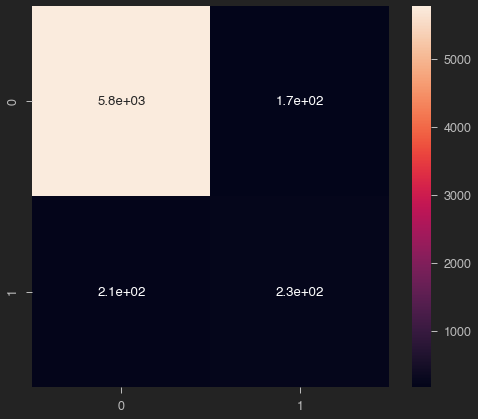

In [111]:
# Creating a confusion matrix using the actual y values vs the y predicted values
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [112]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5948
           1       0.58      0.52      0.55       445

    accuracy                           0.94      6393
   macro avg       0.77      0.75      0.76      6393
weighted avg       0.94      0.94      0.94      6393



The accuracy was lower due to an unbalanced dataset. A different model could also be used to try to classify and train the model instead of the Naive Bayes classifier.